In [1]:
import numpy as np
import xarray as xr
import pandas as pd
from salishsea_tools import viz_tools, places, visualisations
from matplotlib import pyplot as plt, dates
from datetime import datetime, timedelta
from calendar import month_name
from scipy.io import loadmat
from tqdm.notebook import tqdm
from salishsea_tools import nc_tools
from dask.diagnostics import ProgressBar
import cmocean

%matplotlib inline

In [2]:
plt.rcParams.update({'font.size': 12, 'axes.titlesize': 'medium'})

##### Load files from monthly averages

In [3]:
# Load monthly averages
mask = xr.open_dataset('/data/eolson/results/MEOPAR/NEMO-forcing-new/grid/mesh_mask201702.nc')
slc = {'y': slice(450,500), 'x': slice(250,300)} 
e3t, tmask = [mask[var].isel(z=slice(None, 27),**slc).values for var in ('e3t_0', 'tmask')]
years, variables = range(2007, 2021), ['GRMICZDIAT', 'GRMICZMRUB', 'GRMICZPHY', 'GRMICZPON', 'GRMICZMICZ']


# Temporary list dict
data = {}

# Permanent aggregate dict
aggregates = {var: {} for var in variables}

# Loop through years
for year in tqdm(years):
    
    # Initialize lists
    for var in variables: data[var] = []
    
    # Load monthly averages
    for month in range(1, 13):
        datestr = f'{year}{month:02d}'
        prefix = f'/data/sallen/results/MEOPAR/v201905r/SalishSea_1m_{datestr}_{datestr}'
        
        
        # Load grazing variables
        with xr.open_dataset(prefix + '_dia2_T.nc') as ds:
            for var in ['GRMICZDIAT', 'GRMICZMRUB', 'GRMICZPHY', 'GRMICZPON', 'GRMICZMICZ']:
                data[var].append(np.ma.masked_where(tmask == 0, ds[var].isel(deptht=slice(None, 27), **slc).values * e3t).sum(axis=1).data)
    
    # Concatenate months
    for var in variables: aggregates[var][year] = np.concatenate(data[var]).mean(axis=0)

# Add total grazing fields
aggregates['Productivity'] = {}
variables.append('Productivity')
for year in years:
    aggregates['Productivity'][year] = sum(aggregates[var][year] for var in ['GRMICZDIAT', 'GRMICZMRUB', 'GRMICZPHY', 'GRMICZPON', 'GRMICZMICZ'])


   
# Calculate climatological mean and anomalies
for var in variables:
    aggregates[var]['mean'] = np.concatenate([aggregates[var][year][None, ...] for year in years]).mean(axis=0)
    for year in years: aggregates[var][year] = aggregates[var][year] - aggregates[var]['mean']

In [4]:
print(np.shape(aggregates['Productivity'][2015][:]))

(50, 50)


In [5]:
# Reset variables for plotting
tmask = tmask[0, 0, ...]
variables = ['Productivity']

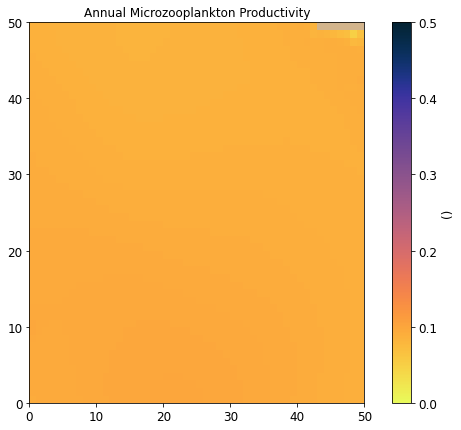

In [6]:
##### with pcolormesh: no smoothing
cmap0=cmocean.cm.balance
cmap0.set_bad('tan')
vmin=0
vmax=0.5
cmap1=cmocean.cm.thermal_r
cmap1.set_bad('tan')
il=0

fig,ax=plt.subplots(1,1,figsize=(10,7))
#fig.suptitle('Annual Anomalies Mesozoop Feeding on Diatoms', fontsize=16)
m0=ax.pcolormesh(np.ma.masked_where(tmask==0,((aggregates['Productivity']['mean']*86400*0.3*5.7*12/1000))),cmap=cmap1,vmin=vmin,vmax=vmax)
viz_tools.set_aspect(ax,coords='grid')
ax.set_title('Annual Microzooplankton Productivity')
fig.colorbar(m0,ax=ax,label='()')




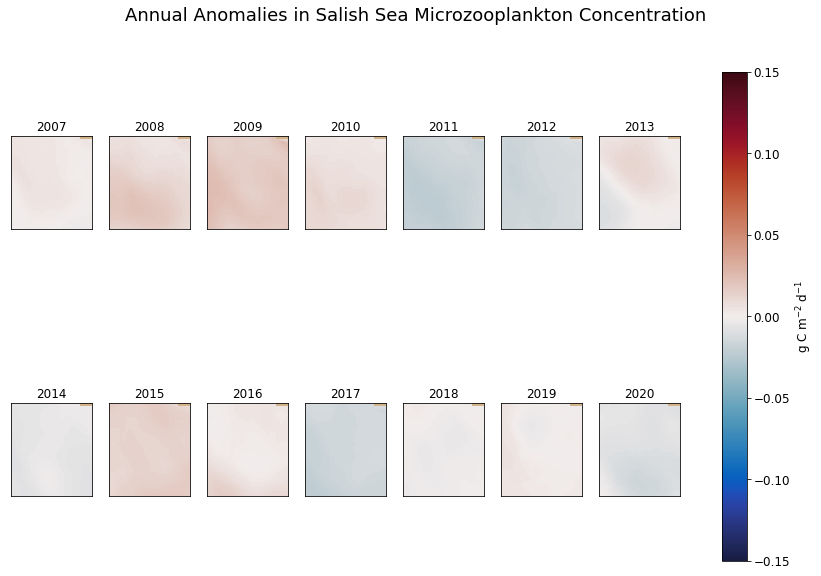

In [7]:
##### with pcolormesh: no smoothing
cmap0=cmocean.cm.balance
cmap0.set_bad('tan')

#cmap1=cmocean.cm.haline
#cmap1.set_bad('k')
il=0
vmin=-0.15
vmax=0.15

fig,ax=plt.subplots(2,7,figsize=(15,9))
fig.suptitle('Annual Anomalies in Salish Sea Microzooplankton Concentration', fontsize=18)


m0=ax[0,0].pcolormesh(np.ma.masked_where(tmask==0,((aggregates['Productivity'][2007]*86400*0.3*5.7*12/1000))),cmap=cmap0,vmin=vmin,vmax=vmax)
viz_tools.set_aspect(ax[0,0],coords='grid')
ax[0,0].set_title('2007')
ax[0,0].yaxis.set_visible(False)
ax[0,0].xaxis.set_visible(False)
ax[0,0].yaxis.set_visible(False)
#fig.colorbar(m0,ax=ax[1])

m0=ax[0,1].pcolormesh(np.ma.masked_where(tmask==0,((aggregates['Productivity'][2008]*86400*0.3*5.7*12/1000))),cmap=cmap0,vmin=vmin,vmax=vmax)
viz_tools.set_aspect(ax[0,1],coords='grid')
ax[0,1].set_title('2008')
ax[0,1].yaxis.set_visible(False)
ax[0,1].xaxis.set_visible(False)
ax[0,1].yaxis.set_visible(False)
#fig.colorbar(m0,ax=ax[2])

m0=ax[0,2].pcolormesh(np.ma.masked_where(tmask==0,((aggregates['Productivity'][2009]*86400*0.3*5.7*12/1000))),cmap=cmap0,vmin=vmin,vmax=vmax)
viz_tools.set_aspect(ax[0,2],coords='grid')
ax[0,2].set_title('2009')
ax[0,2].yaxis.set_visible(False)
ax[0,2].xaxis.set_visible(False)
ax[0,2].yaxis.set_visible(False)
#fig.colorbar(m0,ax=ax[3])

m0=ax[0,3].pcolormesh(np.ma.masked_where(tmask==0,((aggregates['Productivity'][2010]*86400*0.3*5.7*12/1000))),cmap=cmap0,vmin=vmin,vmax=vmax)
viz_tools.set_aspect(ax[0,3],coords='grid')
ax[0,3].set_title('2010')
ax[0,3].yaxis.set_visible(False)
ax[0,3].xaxis.set_visible(False)
ax[0,3].yaxis.set_visible(False)
#fig.colorbar(m0,ax=ax[4])

m0=ax[0,4].pcolormesh(np.ma.masked_where(tmask==0,((aggregates['Productivity'][2011]*86400*0.3*5.7*12/1000))),cmap=cmap0,vmin=vmin,vmax=vmax)
viz_tools.set_aspect(ax[0,4],coords='grid')
ax[0,4].set_title('2011')
ax[0,4].yaxis.set_visible(False)
ax[0,4].xaxis.set_visible(False)
ax[0,4].yaxis.set_visible(False)

m0=ax[0,5].pcolormesh(np.ma.masked_where(tmask==0,((aggregates['Productivity'][2012]*86400*0.3*5.7*12/1000))),cmap=cmap0,vmin=vmin,vmax=vmax)
viz_tools.set_aspect(ax[0,5],coords='grid')
ax[0,5].set_title('2012')
ax[0,5].yaxis.set_visible(False)
ax[0,5].xaxis.set_visible(False)
ax[0,5].yaxis.set_visible(False)

m0=ax[0,6].pcolormesh(np.ma.masked_where(tmask==0,((aggregates['Productivity'][2013]*86400*0.3*5.7*12/1000))),cmap=cmap0,vmin=vmin,vmax=vmax)
viz_tools.set_aspect(ax[0,6],coords='grid')
ax[0,6].set_title('2013')
ax[0,6].yaxis.set_visible(False)
ax[0,6].xaxis.set_visible(False)
ax[0,6].yaxis.set_visible(False)

m0=ax[1,0].pcolormesh(np.ma.masked_where(tmask==0,((aggregates['Productivity'][2014]*86400*0.3*5.7*12/1000))),cmap=cmap0,vmin=vmin,vmax=vmax)
viz_tools.set_aspect(ax[1,0],coords='grid')
ax[1,0].set_title('2014')
ax[1,0].yaxis.set_visible(False)
ax[1,0].xaxis.set_visible(False)
ax[1,0].yaxis.set_visible(False)

m0=ax[1,1].pcolormesh(np.ma.masked_where(tmask==0,((aggregates['Productivity'][2015]*86400*0.3*5.7*12/1000))),cmap=cmap0,vmin=vmin,vmax=vmax)
viz_tools.set_aspect(ax[1,1],coords='grid')
ax[1,1].set_title('2015')
ax[1,1].yaxis.set_visible(False)
ax[1,1].xaxis.set_visible(False)
ax[1,1].yaxis.set_visible(False)

m0=ax[1,2].pcolormesh(np.ma.masked_where(tmask==0,((aggregates['Productivity'][2016]*86400*0.3*5.7*12/1000))),cmap=cmap0,vmin=vmin,vmax=vmax)
viz_tools.set_aspect(ax[1,2],coords='grid')
ax[1,2].set_title('2016')
ax[1,2].yaxis.set_visible(False)
ax[1,2].xaxis.set_visible(False)
ax[1,2].yaxis.set_visible(False)

m0=ax[1,3].pcolormesh(np.ma.masked_where(tmask==0,((aggregates['Productivity'][2017]*86400*0.3*5.7*12/1000))),cmap=cmap0,vmin=vmin,vmax=vmax)
viz_tools.set_aspect(ax[1,3],coords='grid')
ax[1,3].set_title('2017')
ax[1,3].yaxis.set_visible(False)
ax[1,3].xaxis.set_visible(False)
ax[1,3].yaxis.set_visible(False)

m0=ax[1,4].pcolormesh(np.ma.masked_where(tmask==0,((aggregates['Productivity'][2018]*86400*0.3*5.7*12/1000))),cmap=cmap0,vmin=vmin,vmax=vmax)
viz_tools.set_aspect(ax[1,4],coords='grid')
ax[1,4].set_title('2018')
ax[1,4].yaxis.set_visible(False)
ax[1,4].xaxis.set_visible(False)
ax[1,4].yaxis.set_visible(False)

m0=ax[1,5].pcolormesh(np.ma.masked_where(tmask==0,((aggregates['Productivity'][2019]*86400*0.3*5.7*12/1000))),cmap=cmap0,vmin=vmin,vmax=vmax)
viz_tools.set_aspect(ax[1,5],coords='grid')
ax[1,5].set_title('2019')
ax[1,5].yaxis.set_visible(False)
ax[1,5].xaxis.set_visible(False)
ax[1,5].yaxis.set_visible(False)

m0=ax[1,6].pcolormesh(np.ma.masked_where(tmask==0,((aggregates['Productivity'][2020]*86400*0.3*5.7*12/1000))),cmap=cmap0,vmin=vmin,vmax=vmax)
viz_tools.set_aspect(ax[1,6],coords='grid')
ax[1,6].set_title('2020')
ax[1,6].yaxis.set_visible(False)
ax[1,6].xaxis.set_visible(False)
ax[1,6].yaxis.set_visible(False)

fig.colorbar(m0,ax=ax,label='g C m$^{-2}$ d$^{-1}$')



### Microzoop Productivity Calculations

In [8]:

#years, months, data
monthly_array_microdiat_depthint_slice = np.zeros([14,12,50,50])
# Load monthly averages
mask = xr.open_dataset('/data/eolson/results/MEOPAR/NEMO-forcing-new/grid/mesh_mask201702.nc')
slc = {'y': slice(450,500), 'x': slice(250,300)}
e3t, tmask = [mask[var].isel(z=slice(None, 27),**slc).values for var in ('e3t_0', 'tmask')]
years, variables = range(2007, 2021), ['GRMICZDIAT']
# Temporary list dict
data = {}
# Permanent aggregate dict
aggregates = {var: {} for var in variables}
monthlydat = {var: {} for var in variables}
# Loop through years
for year in [2007,2008,2009,2010,2011,2012,2013,2014,2015, 2016, 2017, 2018, 2019,2020]:
    # Initialize lists
    for var in variables: data[var] = []
    # Load monthly averages
    for month in range(1, 13):
        datestr = f'{year}{month:02d}'
        prefix = f'/data/sallen/results/MEOPAR/v201905r/SalishSea_1m_{datestr}_{datestr}'
        # Load grazing variables
        with xr.open_dataset(prefix + '_dia2_T.nc') as ds:
            q = np.ma.masked_where(tmask == 0, ds[var].isel(deptht=slice(None, 27), **slc).values * e3t).sum(axis=1).data
            q2 = q[0,:,:]
            monthly_array_microdiat_depthint_slice[year-2007,month-1,:,:] = q2 #year2007 is index 0 along 1st dimension
            for var in ['GRMICZDIAT']:
                data[var].append(np.ma.masked_where(tmask == 0, ds[var].isel(deptht=slice(None, 27), **slc).values * e3t).sum(axis=1).data)
    # Concatenate months
    for var in variables: aggregates[var][year] = np.concatenate(data[var]).mean(axis=0)


In [9]:
monthly_array_microdiat_depthint_slice[monthly_array_microdiat_depthint_slice == 0 ] = np.nan
monthly_array_microdiat_depthint_slicemean = \
np.nanmean(np.nanmean(monthly_array_microdiat_depthint_slice, axis = 2),axis = 2)
print(np.shape(monthly_array_microdiat_depthint_slicemean))

(14, 12)


<ipython-input-9-e97867977900>:3: RuntimeWarning: Mean of empty slice
  np.nanmean(np.nanmean(monthly_array_microdiat_depthint_slice, axis = 2),axis = 2)


In [10]:
#years, months, data
monthly_array_microflag_depthint_slice = np.zeros([14,12,50,50])
# Load monthly averages
mask = xr.open_dataset('/data/eolson/results/MEOPAR/NEMO-forcing-new/grid/mesh_mask201702.nc')
slc = {'y': slice(450,500), 'x': slice(250,300)}
e3t, tmask = [mask[var].isel(z=slice(None, 27),**slc).values for var in ('e3t_0', 'tmask')]
years, variables = range(2007, 2021), ['GRMICZPHY']
# Temporary list dict
data = {}
# Permanent aggregate dict
aggregates = {var: {} for var in variables}
monthlydat = {var: {} for var in variables}
# Loop through years
for year in [2007,2008,2009,2010,2011,2012,2013,2014,2015, 2016, 2017, 2018, 2019,2020]:
    # Initialize lists
    for var in variables: data[var] = []
    # Load monthly averages
    for month in range(1, 13):
        datestr = f'{year}{month:02d}'
        prefix = f'/data/sallen/results/MEOPAR/v201905r/SalishSea_1m_{datestr}_{datestr}'
        # Load grazing variables
        with xr.open_dataset(prefix + '_dia2_T.nc') as ds:
            q = np.ma.masked_where(tmask == 0, ds[var].isel(deptht=slice(None, 27), **slc).values * e3t).sum(axis=1).data
            q2 = q[0,:,:]
            monthly_array_microflag_depthint_slice[year-2007,month-1,:,:] = q2 #year2007 is index 0 along 1st dimension
            for var in ['GRMICZPHY']:
                data[var].append(np.ma.masked_where(tmask == 0, ds[var].isel(deptht=slice(None, 27), **slc).values * e3t).sum(axis=1).data)
    # Concatenate months
    for var in variables: aggregates[var][year] = np.concatenate(data[var]).mean(axis=0)



In [11]:
monthly_array_microflag_depthint_slice[monthly_array_microflag_depthint_slice == 0 ] = np.nan
monthly_array_microflag_depthint_slicemean = \
np.nanmean(np.nanmean(monthly_array_microflag_depthint_slice, axis = 2),axis = 2)
print(np.shape(monthly_array_microflag_depthint_slicemean))

(14, 12)


In [12]:
#years, months, data
monthly_array_microcil_depthint_slice = np.zeros([14,12,50,50])
# Load monthly averages
mask = xr.open_dataset('/data/eolson/results/MEOPAR/NEMO-forcing-new/grid/mesh_mask201702.nc')
slc = {'y': slice(450,500), 'x': slice(250,300)}
e3t, tmask = [mask[var].isel(z=slice(None, 27),**slc).values for var in ('e3t_0', 'tmask')]
years, variables = range(2007, 2021), ['GRMICZMRUB']
# Temporary list dict
data = {}
# Permanent aggregate dict
aggregates = {var: {} for var in variables}
monthlydat = {var: {} for var in variables}
# Loop through years
for year in [2007,2008,2009,2010,2011,2012,2013,2014,2015, 2016, 2017, 2018, 2019,2020]:
    # Initialize lists
    for var in variables: data[var] = []
    # Load monthly averages
    for month in range(1, 13):
        datestr = f'{year}{month:02d}'
        prefix = f'/data/sallen/results/MEOPAR/v201905r/SalishSea_1m_{datestr}_{datestr}'
        # Load grazing variables
        with xr.open_dataset(prefix + '_dia2_T.nc') as ds:
            q = np.ma.masked_where(tmask == 0, ds[var].isel(deptht=slice(None, 27), **slc).values * e3t).sum(axis=1).data
            q2 = q[0,:,:]
            monthly_array_microcil_depthint_slice[year-2007,month-1,:,:] = q2 #year2007 is index 0 along 1st dimension
            for var in ['GRMICZMRUB']:
                data[var].append(np.ma.masked_where(tmask == 0, ds[var].isel(deptht=slice(None, 27), **slc).values * e3t).sum(axis=1).data)
    # Concatenate months
    for var in variables: aggregates[var][year] = np.concatenate(data[var]).mean(axis=0)




In [13]:
monthly_array_microcil_depthint_slice[monthly_array_microcil_depthint_slice == 0 ] = np.nan
monthly_array_microcil_depthint_slicemean = \
np.nanmean(np.nanmean(monthly_array_microcil_depthint_slice, axis = 2),axis = 2)
print(np.shape(monthly_array_microcil_depthint_slicemean))

(14, 12)


<ipython-input-13-2daeaaa93ee7>:3: RuntimeWarning: Mean of empty slice
  np.nanmean(np.nanmean(monthly_array_microcil_depthint_slice, axis = 2),axis = 2)


In [14]:
#years, months, data
monthly_array_microPON_depthint_slice = np.zeros([14,12,50,50])
# Load monthly averages
mask = xr.open_dataset('/data/eolson/results/MEOPAR/NEMO-forcing-new/grid/mesh_mask201702.nc')
slc = {'y': slice(450,500), 'x': slice(250,300)}
e3t, tmask = [mask[var].isel(z=slice(None, 27),**slc).values for var in ('e3t_0', 'tmask')]
years, variables = range(2007, 2021), ['GRMICZPON']
# Temporary list dict
data = {}
# Permanent aggregate dict
aggregates = {var: {} for var in variables}
monthlydat = {var: {} for var in variables}
# Loop through years
for year in [2007,2008,2009,2010,2011,2012,2013,2014,2015, 2016, 2017, 2018, 2019,2020]:
    # Initialize lists
    for var in variables: data[var] = []
    # Load monthly averages
    for month in range(1, 13):
        datestr = f'{year}{month:02d}'
        prefix = f'/data/sallen/results/MEOPAR/v201905r/SalishSea_1m_{datestr}_{datestr}'
        # Load grazing variables
        with xr.open_dataset(prefix + '_dia2_T.nc') as ds:
            q = np.ma.masked_where(tmask == 0, ds[var].isel(deptht=slice(None, 27), **slc).values * e3t).sum(axis=1).data
            q2 = q[0,:,:]
            monthly_array_microPON_depthint_slice[year-2007,month-1,:,:] = q2 #year2007 is index 0 along 1st dimension
            for var in ['GRMICZPON']:
                data[var].append(np.ma.masked_where(tmask == 0, ds[var].isel(deptht=slice(None, 27), **slc).values * e3t).sum(axis=1).data)
    # Concatenate months
    for var in variables: aggregates[var][year] = np.concatenate(data[var]).mean(axis=0)





In [15]:
monthly_array_microPON_depthint_slice[monthly_array_microPON_depthint_slice == 0 ] = np.nan
monthly_array_microPON_depthint_slicemean = \
np.nanmean(np.nanmean(monthly_array_microPON_depthint_slice, axis = 2),axis = 2)
print(np.shape(monthly_array_microPON_depthint_slicemean))

(14, 12)


<ipython-input-15-7c72f4fddc37>:3: RuntimeWarning: Mean of empty slice
  np.nanmean(np.nanmean(monthly_array_microPON_depthint_slice, axis = 2),axis = 2)


In [16]:
#years, months, data
monthly_array_micromicro_depthint_slice = np.zeros([14,12,50,50])
# Load monthly averages
mask = xr.open_dataset('/data/eolson/results/MEOPAR/NEMO-forcing-new/grid/mesh_mask201702.nc')
slc = {'y': slice(450,500), 'x': slice(250,300)}
e3t, tmask = [mask[var].isel(z=slice(None, 27),**slc).values for var in ('e3t_0', 'tmask')]
years, variables = range(2007, 2021), ['GRMICZMICZ']
# Temporary list dict
data = {}
# Permanent aggregate dict
aggregates = {var: {} for var in variables}
monthlydat = {var: {} for var in variables}
# Loop through years
for year in [2007,2008,2009,2010,2011,2012,2013,2014,2015, 2016, 2017, 2018, 2019,2020]:
    # Initialize lists
    for var in variables: data[var] = []
    # Load monthly averages
    for month in range(1, 13):
        datestr = f'{year}{month:02d}'
        prefix = f'/data/sallen/results/MEOPAR/v201905r/SalishSea_1m_{datestr}_{datestr}'
        # Load grazing variables
        with xr.open_dataset(prefix + '_dia2_T.nc') as ds:
            q = np.ma.masked_where(tmask == 0, ds[var].isel(deptht=slice(None, 27), **slc).values * e3t).sum(axis=1).data
            q2 = q[0,:,:]
            monthly_array_micromicro_depthint_slice[year-2007,month-1,:,:] = q2 #year2007 is index 0 along 1st dimension
            for var in ['GRMICZMICZ']:
                data[var].append(np.ma.masked_where(tmask == 0, ds[var].isel(deptht=slice(None, 27), **slc).values * e3t).sum(axis=1).data)
    # Concatenate months
    for var in variables: aggregates[var][year] = np.concatenate(data[var]).mean(axis=0)





In [17]:
monthly_array_micromicro_depthint_slice[monthly_array_micromicro_depthint_slice == 0 ] = np.nan
monthly_array_micromicro_depthint_slicemean = \
np.nanmean(np.nanmean(monthly_array_micromicro_depthint_slice, axis = 2),axis = 2)
print(np.shape(monthly_array_micromicro_depthint_slicemean))

(14, 12)


<ipython-input-17-b3f63fd0a9e1>:3: RuntimeWarning: Mean of empty slice
  np.nanmean(np.nanmean(monthly_array_micromicro_depthint_slice, axis = 2),axis = 2)


In [18]:
SProd=(monthly_array_microflag_depthint_slicemean+monthly_array_microdiat_depthint_slicemean+monthly_array_microflag_depthint_slicemean+monthly_array_microPON_depthint_slicemean+monthly_array_micromicro_depthint_slicemean)*86400*0.6/1000

In [19]:
SProd

array([[       nan,        nan,        nan, 0.00508379, 0.00650855,
        0.00740852, 0.00969529, 0.00912448, 0.00451738,        nan,
               nan,        nan],
       [       nan,        nan,        nan, 0.0074499 , 0.00497572,
        0.0087652 , 0.01175848, 0.00508607, 0.00303485, 0.00069983,
               nan,        nan],
       [       nan,        nan,        nan, 0.0054682 , 0.00686536,
        0.00894804, 0.01316202, 0.00678397, 0.00397245,        nan,
               nan,        nan],
       [       nan,        nan, 0.00140468, 0.00432519, 0.00584886,
        0.00916565, 0.01223825, 0.00703869, 0.00279356,        nan,
               nan,        nan],
       [       nan,        nan,        nan, 0.00106932, 0.00467459,
        0.01008864, 0.00782561, 0.0081645 , 0.0042721 ,        nan,
               nan,        nan],
       [       nan,        nan,        nan, 0.00303064, 0.00806097,
        0.00434947, 0.00858166, 0.00840942, 0.0045952 , 0.00098731,
               nan,

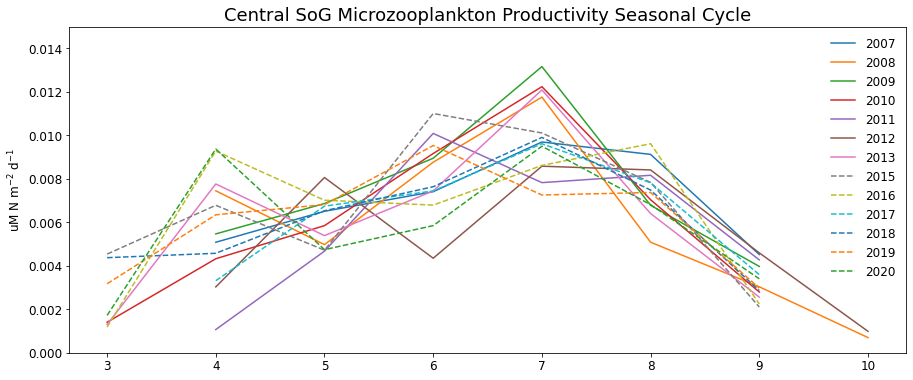

In [20]:
#plot monthly means for 5 years
fig, ax = plt.subplots(figsize=(15, 6))
bbox = {'boxstyle': 'round', 'facecolor': 'w', 'alpha': 0.9}
cmap = plt.get_cmap('tab10')
palette = [cmap(0), cmap(0.2), 'k', cmap(0.1), cmap(0.3)]


for i in range(0,7):
    ax.plot(np.arange(1,13), SProd[i,:],label=2007+i)
    ax.set_title('Central SoG Microzooplankton Seasonal Cycle',fontsize=18)
    ax.legend(frameon=False)
    ax.set_ylim(0,0.015)
    ax.set_ylabel('\u03bcmol N')
   
for i in range(8,14):
    ax.plot(np.arange(1,13), SProd[i,:],linestyle='--',label=2007+i)
    ax.set_title('Central SoG Microzooplankton Productivity Seasonal Cycle',fontsize=18)
    ax.legend(frameon=False)
    ax.set_ylim(0,0.015)
    ax.set_ylabel('uM N m$^{-2}$ d$^{-1}$')

In [21]:
NPGOpositive_SP=(((SProd[0,:]+SProd[1,:]+\
        SProd[2,:]+SProd[3,:]+\
        SProd[4,:]+SProd[5,:]+\
        SProd[6,:])/7))

In [22]:
NPGOpositive_SP

array([       nan,        nan,        nan, 0.00488429, 0.00604623,
       0.0080242 , 0.01076454, 0.00728735, 0.00367787,        nan,
              nan,        nan])

In [51]:
NPGOpositive_SP*5.7*12

array([       nan,        nan,        nan, 0.33408577, 0.41356207,
       0.54885504, 0.73629467, 0.49845474, 0.25156647,        nan,
              nan,        nan])

In [23]:
NPGOnegative_SP=(((SProd[7,:]+SProd[8,:]+\
        SProd[9,:]+SProd[10,:]+\
        SProd[11,:]+SProd[12,:]+\
        SProd[13,:])/7))

In [24]:
NPGOnegative_SP

array([       nan,        nan,        nan, 0.00665162, 0.00589402,
       0.00817608, 0.00917655, 0.00791318, 0.00306589,        nan,
              nan,        nan])

In [52]:
NPGOnegative_SP*5.7*12

array([       nan,        nan,        nan, 0.45497068, 0.40315101,
       0.55924405, 0.62767609, 0.54126185, 0.20970705,        nan,
              nan,        nan])

Text(0, 0.5, 'uM N m$^{-2}$ d$^{-1}$')

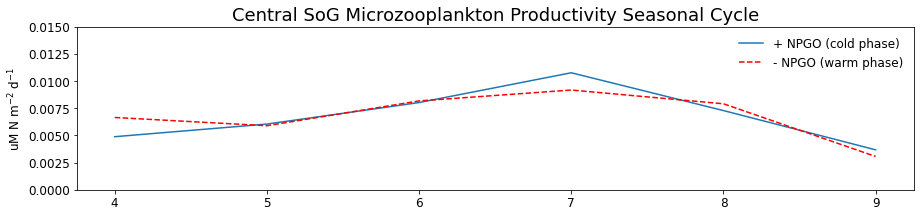

In [25]:
fig, ax = plt.subplots(figsize=(15, 3))
bbox = {'boxstyle': 'round', 'facecolor': 'w', 'alpha': 0.9}
cmap = plt.get_cmap('tab10')
palette = [cmap(0), cmap(0.2), 'k', cmap(0.1), cmap(0.3)]


ax.plot(np.arange(1,13), NPGOpositive_SP,label='+ NPGO (cold phase)')
ax.plot(np.arange(1,13), NPGOnegative_SP,linestyle='--',label='- NPGO (warm phase)',color='r')
ax.set_title('Central SoG Microzooplankton Productivity Seasonal Cycle',fontsize=18)
ax.legend(frameon=False)
ax.set_ylim(0,0.015)
ax.set_ylabel('uM N m$^{-2}$ d$^{-1}$')
   

### Primary Productivity Calculations

In [26]:
#years, months, data
monthly_array_ppdiat_depthint_slice = np.zeros([14,12,50,50])
# Load monthly averages
mask = xr.open_dataset('/data/eolson/results/MEOPAR/NEMO-forcing-new/grid/mesh_mask201702.nc')
slc = {'y': slice(450,500), 'x': slice(250,300)}
e3t, tmask = [mask[var].isel(z=slice(None, 27),**slc).values for var in ('e3t_0', 'tmask')]
years, variables = range(2007, 2021), ['PPDIAT']
# Temporary list dict
data = {}
# Permanent aggregate dict
aggregates = {var: {} for var in variables}
monthlydat = {var: {} for var in variables}
# Loop through years
for year in [2007,2008,2009,2010,2011,2012,2013,2014,2015, 2016, 2017, 2018, 2019,2020]:
    # Initialize lists
    for var in variables: data[var] = []
    # Load monthly averages
    for month in range(1, 13):
        datestr = f'{year}{month:02d}'
        prefix = f'/data/sallen/results/MEOPAR/v201905r/SalishSea_1m_{datestr}_{datestr}'
        # Load grazing variables
        with xr.open_dataset(prefix + '_prod_T.nc') as ds:
            q = np.ma.masked_where(tmask == 0, ds[var].isel(deptht=slice(None, 27), **slc).values * e3t).sum(axis=1).data
            q2 = q[0,:,:]
            monthly_array_ppdiat_depthint_slice[year-2007,month-1,:,:] = q2 #year2007 is index 0 along 1st dimension
            for var in ['PPDIAT']:
                data[var].append(np.ma.masked_where(tmask == 0, ds[var].isel(deptht=slice(None, 27), **slc).values * e3t).sum(axis=1).data)
    # Concatenate months
    for var in variables: aggregates[var][year] = np.concatenate(data[var]).mean(axis=0)




In [27]:
monthly_array_ppdiat_depthint_slice[monthly_array_ppdiat_depthint_slice == 0 ] = np.nan
monthly_array_ppdiat_depthint_slicemean = \
np.nanmean(np.nanmean(monthly_array_ppdiat_depthint_slice, axis = 2),axis = 2)
print(np.shape(monthly_array_ppdiat_depthint_slicemean))

(14, 12)


In [28]:
#years, months, data
monthly_array_ppflag_depthint_slice = np.zeros([14,12,50,50])
# Load monthly averages
mask = xr.open_dataset('/data/eolson/results/MEOPAR/NEMO-forcing-new/grid/mesh_mask201702.nc')
slc = {'y': slice(450,500), 'x': slice(250,300)}
e3t, tmask = [mask[var].isel(z=slice(None, 27),**slc).values for var in ('e3t_0', 'tmask')]
years, variables = range(2007, 2021), ['PPPHY']
# Temporary list dict
data = {}
# Permanent aggregate dict
aggregates = {var: {} for var in variables}
monthlydat = {var: {} for var in variables}
# Loop through years
for year in [2007,2008,2009,2010,2011,2012,2013,2014,2015, 2016, 2017, 2018, 2019,2020]:
    # Initialize lists
    for var in variables: data[var] = []
    # Load monthly averages
    for month in range(1, 13):
        datestr = f'{year}{month:02d}'
        prefix = f'/data/sallen/results/MEOPAR/v201905r/SalishSea_1m_{datestr}_{datestr}'
        # Load grazing variables
        with xr.open_dataset(prefix + '_prod_T.nc') as ds:
            q = np.ma.masked_where(tmask == 0, ds[var].isel(deptht=slice(None, 27), **slc).values * e3t).sum(axis=1).data
            q2 = q[0,:,:]
            monthly_array_ppflag_depthint_slice[year-2007,month-1,:,:] = q2 #year2007 is index 0 along 1st dimension
            for var in ['PPPHY']:
                data[var].append(np.ma.masked_where(tmask == 0, ds[var].isel(deptht=slice(None, 27), **slc).values * e3t).sum(axis=1).data)
    # Concatenate months
    for var in variables: aggregates[var][year] = np.concatenate(data[var]).mean(axis=0)




In [29]:
monthly_array_ppflag_depthint_slice[monthly_array_ppflag_depthint_slice == 0 ] = np.nan
monthly_array_ppflag_depthint_slicemean = \
np.nanmean(np.nanmean(monthly_array_ppflag_depthint_slice, axis = 2),axis = 2)
print(np.shape(monthly_array_ppflag_depthint_slicemean))

(14, 12)


In [30]:
#years, months, data
monthly_array_ppcil_depthint_slice = np.zeros([14,12,50,50])
# Load monthly averages
mask = xr.open_dataset('/data/eolson/results/MEOPAR/NEMO-forcing-new/grid/mesh_mask201702.nc')
slc = {'y': slice(450,500), 'x': slice(250,300)}
e3t, tmask = [mask[var].isel(z=slice(None, 27),**slc).values for var in ('e3t_0', 'tmask')]
years, variables = range(2007, 2021), ['PPMRUB']
# Temporary list dict
data = {}
# Permanent aggregate dict
aggregates = {var: {} for var in variables}
monthlydat = {var: {} for var in variables}
# Loop through years
for year in [2007,2008,2009,2010,2011,2012,2013,2014,2015, 2016, 2017, 2018, 2019,2020]:
    # Initialize lists
    for var in variables: data[var] = []
    # Load monthly averages
    for month in range(1, 13):
        datestr = f'{year}{month:02d}'
        prefix = f'/data/sallen/results/MEOPAR/v201905r/SalishSea_1m_{datestr}_{datestr}'
        # Load grazing variables
        with xr.open_dataset(prefix + '_prod_T.nc') as ds:
            q = np.ma.masked_where(tmask == 0, ds[var].isel(deptht=slice(None, 27), **slc).values * e3t).sum(axis=1).data
            q2 = q[0,:,:]
            monthly_array_ppcil_depthint_slice[year-2007,month-1,:,:] = q2 #year2007 is index 0 along 1st dimension
            for var in ['PPMRUB']:
                data[var].append(np.ma.masked_where(tmask == 0, ds[var].isel(deptht=slice(None, 27), **slc).values * e3t).sum(axis=1).data)
    # Concatenate months
    for var in variables: aggregates[var][year] = np.concatenate(data[var]).mean(axis=0)




In [31]:
monthly_array_ppcil_depthint_slice[monthly_array_ppcil_depthint_slice == 0 ] = np.nan
monthly_array_ppcil_depthint_slicemean = \
np.nanmean(np.nanmean(monthly_array_ppcil_depthint_slice, axis = 2),axis = 2)
print(np.shape(monthly_array_ppcil_depthint_slicemean))

(14, 12)


In [32]:
PProd=(monthly_array_ppdiat_depthint_slicemean+monthly_array_ppflag_depthint_slicemean+monthly_array_ppcil_depthint_slicemean)*86400/1000

In [33]:
PProd

array([[0.00114778, 0.00176998, 0.00258921, 0.0157979 , 0.01840007,
        0.0154337 , 0.0172183 , 0.01538667, 0.01304007, 0.00173136,
        0.00098758, 0.00061768],
       [0.00102975, 0.00209371, 0.00438456, 0.01899991, 0.02081508,
        0.01640843, 0.01816127, 0.01368271, 0.01188244, 0.00260517,
        0.00083411, 0.00068926],
       [0.00116641, 0.00213465, 0.00348684, 0.02078462, 0.01740894,
        0.01696057, 0.02061311, 0.01546507, 0.01048794, 0.00260983,
        0.00079019, 0.00096481],
       [0.00085286, 0.00188361, 0.00525559, 0.01705153, 0.0173903 ,
        0.01814666, 0.02029396, 0.01622919, 0.00995454, 0.00268386,
        0.00106423, 0.00063441],
       [0.00099809, 0.00172979, 0.00232856, 0.00799213, 0.01831847,
        0.01743198, 0.01466777, 0.01493596, 0.01142849, 0.00196826,
        0.00103863, 0.00101377],
       [0.00089721, 0.00170708, 0.00245709, 0.01451038, 0.01965011,
        0.01573995, 0.01601666, 0.01770174, 0.0129187 , 0.00284547,
        0.00081353,

In [34]:
NPGOpositive_PP=(((PProd[0,:]+PProd[1,:]+\
        PProd[2,:]+PProd[3,:]+\
        PProd[4,:]+PProd[5,:]+\
        PProd[6,:])/7))

In [35]:
NPGOpositive_PP

array([0.00105301, 0.00189597, 0.00398165, 0.01614065, 0.01828535,
       0.01649409, 0.01795287, 0.01529691, 0.01092933, 0.00241207,
       0.00095934, 0.0007959 ])

In [36]:
NPGOnegative_PP=(((PProd[7,:]+PProd[8,:]+\
        PProd[9,:]+PProd[10,:]+\
        PProd[11,:]+PProd[12,:]+\
        PProd[13,:])/7))

In [37]:
NPGOnegative_PP

array([0.00109573, 0.00200444, 0.0079301 , 0.01696517, 0.01670243,
       0.01633749, 0.01655577, 0.01615388, 0.00782278, 0.00198446,
       0.0010971 , 0.0007892 ])

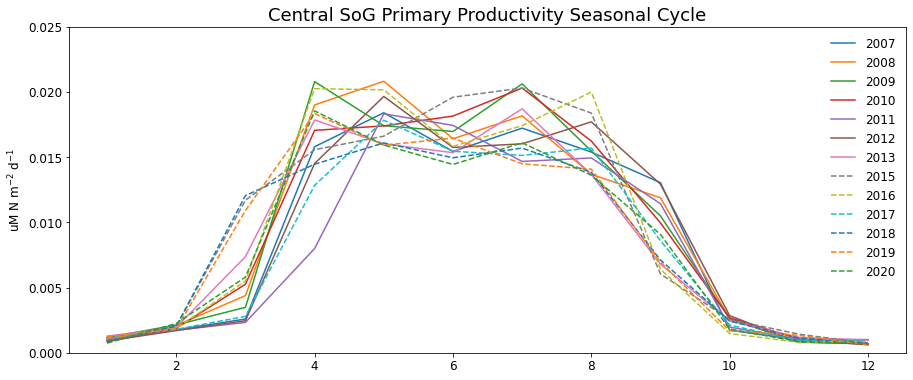

In [40]:
#plot monthly means for 5 years
fig, ax = plt.subplots(figsize=(15, 6))
bbox = {'boxstyle': 'round', 'facecolor': 'w', 'alpha': 0.9}
cmap = plt.get_cmap('tab10')
palette = [cmap(0), cmap(0.2), 'k', cmap(0.1), cmap(0.3)]


for i in range(0,7):
    ax.plot(np.arange(1,13), PProd[i,:],label=2007+i)
    ax.set_title('Central SoG Primary Productivity Seasonal Cycle',fontsize=18)
    ax.legend(frameon=False)
    ax.set_ylim(0,0.025)
    ax.set_ylabel('\u03bcmol N')
   
for i in range(8,14):
    ax.plot(np.arange(1,13), PProd[i,:],linestyle='--',label=2007+i)
    ax.set_title('Central SoG Primary Productivity Seasonal Cycle',fontsize=18)
    ax.legend(frameon=False)
    ax.set_ylim(0,0.025)
    ax.set_ylabel('uM N m$^{-2}$ d$^{-1}$')

Text(0, 0.5, 'uM N m$^{-2}$ d$^{-1}$')

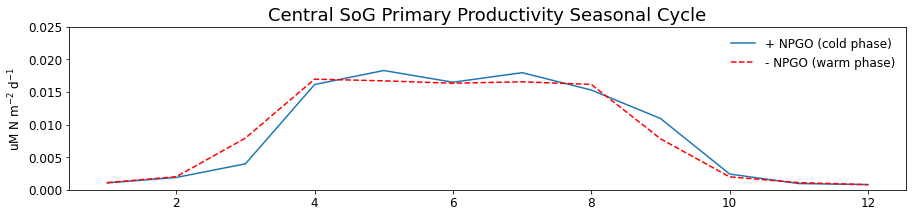

In [41]:
fig, ax = plt.subplots(figsize=(15, 3))
bbox = {'boxstyle': 'round', 'facecolor': 'w', 'alpha': 0.9}
cmap = plt.get_cmap('tab10')
palette = [cmap(0), cmap(0.2), 'k', cmap(0.1), cmap(0.3)]


ax.plot(np.arange(1,13), NPGOpositive_PP,label='+ NPGO (cold phase)')
ax.plot(np.arange(1,13), NPGOnegative_PP,linestyle='--',label='- NPGO (warm phase)',color='r')
ax.set_title('Central SoG Primary Productivity Seasonal Cycle',fontsize=18)
ax.legend(frameon=False)
ax.set_ylim(0,0.025)
ax.set_ylabel('uM N m$^{-2}$ d$^{-1}$')

### Trophic Transfer Efficiency

In [42]:
TTE=SProd/PProd*100

In [43]:
TTE

array([[        nan,         nan,         nan, 32.18015087, 35.37242906,
        48.0022143 , 56.30808741, 59.30117141, 34.64234036,         nan,
                nan,         nan],
       [        nan,         nan,         nan, 39.21021534, 23.9043978 ,
        53.41889276, 64.74481879, 37.17146952, 25.54059865, 26.86312576,
                nan,         nan],
       [        nan,         nan,         nan, 26.30887966, 39.43580472,
        52.7579172 , 63.85265381, 43.86643832, 37.87638693,         nan,
                nan,         nan],
       [        nan,         nan, 26.72733502, 25.36539457, 33.6328814 ,
        50.50872172, 60.30488862, 43.37054936, 28.06316452,         nan,
                nan,         nan],
       [        nan,         nan,         nan, 13.37968128, 25.51846749,
        57.87430497, 53.35242756, 54.66336324, 37.38113353,         nan,
                nan,         nan],
       [        nan,         nan,         nan, 20.88602597, 41.02250558,
        27.63334878, 5

In [44]:
NPGOpositive_TTE=(((TTE[0,:]+TTE[1,:]+\
        TTE[2,:]+TTE[3,:]+\
        TTE[4,:]+TTE[5,:]+\
        TTE[6,:])/7))

In [45]:
NPGOpositive_TTE

array([        nan,         nan,         nan, 28.6893338 , 33.22009958,
       48.38992846, 59.54298786, 47.52923354, 33.82179541,         nan,
               nan,         nan])

In [46]:
NPGOnegative_TTE=(((TTE[7,:]+TTE[8,:]+\
        TTE[9,:]+TTE[10,:]+\
        TTE[11,:]+TTE[12,:]+\
        TTE[13,:])/7))

In [47]:
NPGOnegative_TTE

array([        nan,         nan,         nan, 38.39339558, 35.26058516,
       49.66198543, 55.73026342, 49.34302619, 38.95626601,         nan,
               nan,         nan])

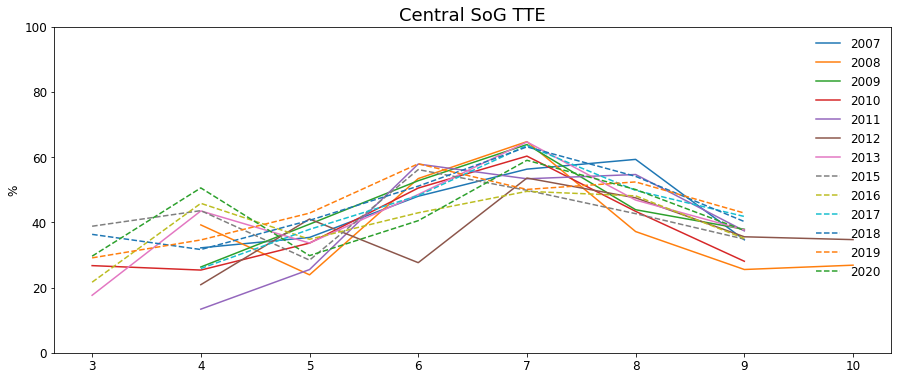

In [49]:
#plot monthly means for 5 years
fig, ax = plt.subplots(figsize=(15, 6))
bbox = {'boxstyle': 'round', 'facecolor': 'w', 'alpha': 0.9}
cmap = plt.get_cmap('tab10')
palette = [cmap(0), cmap(0.2), 'k', cmap(0.1), cmap(0.3)]


for i in range(0,7):
    ax.plot(np.arange(1,13), TTE[i,:],label=2007+i)
    ax.set_title('Central SoG TTE',fontsize=18)
    ax.legend(frameon=False)
    ax.set_ylim(0,100)
    ax.set_ylabel('\u03bcmol N')
   
for i in range(8,14):
    ax.plot(np.arange(1,13), TTE[i,:],linestyle='--',label=2007+i)
    ax.set_title('Central SoG TTE',fontsize=18)
    ax.legend(frameon=False)
    ax.set_ylim(0,100)
    ax.set_ylabel('%')

Text(0, 0.5, '%')

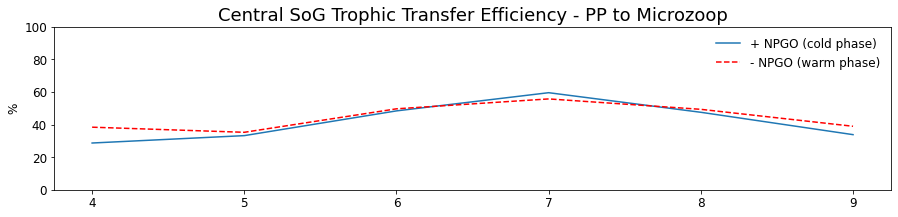

In [50]:
fig, ax = plt.subplots(figsize=(15, 3))
bbox = {'boxstyle': 'round', 'facecolor': 'w', 'alpha': 0.9}
cmap = plt.get_cmap('tab10')
palette = [cmap(0), cmap(0.2), 'k', cmap(0.1), cmap(0.3)]


ax.plot(np.arange(1,13), NPGOpositive_TTE,label='+ NPGO (cold phase)')
ax.plot(np.arange(1,13), NPGOnegative_TTE,linestyle='--',label='- NPGO (warm phase)',color='r')
ax.set_title('Central SoG Trophic Transfer Efficiency - PP to Microzoop',fontsize=18)
ax.legend(frameon=False)
ax.set_ylim(0,100)
ax.set_ylabel('%')